# Linear Regrssion Model to Predict Service Times 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import *
from sklearn.metrics         import mean_squared_error
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import OneHotEncoder
from sklearn.preprocessing   import LabelEncoder


In [ ]:
# !pip install rfpimp

In [ ]:
data = pd.read_excel('RGG_RSS_final.xlsx')
data.columns

Index(['Commodity', 'Vehicle Type', 'Inside/Curb', '16 gal', '20 gal',
       '32 gal', '64 gal', '96 gal', 'Meandor', 'Route', 'Tipper', 'Day',
       '#Units', 'Time', 'Company', 'Outlier', 'Truck', 'Neighborhood',
       'Address_Street', 'Code', 'Has Key'],
      dtype='object')

In [ ]:
# Create train_df that only include variables of interest 

train_df = data[['16 gal', '20 gal',
       '32 gal', '64 gal', '96 gal']]
train_df

,16 gal,20 gal,32 gal,64 gal,96 gal
0,0,0,1,2,2
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,1
4,0,0,1,0,0
...,...,...,...,...,...
12821,0,0,0,1,0
12822,0,0,0,3,0
12823,0,0,0,2,0
12824,0,0,0,2,0


In [ ]:
X = train_df
y = data['Time']

In [ ]:
# Create Train and validation sets 
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state=16)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lr', LinearRegression())]) 



In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

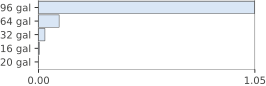

In [ ]:
from rfpimp import *
lm = LinearRegression()
lm.fit(X_train, y_train)
I = importances(lm, X_train, y_train)
plot_importances(I)

In [ ]:
I.sort_values(['Importance'],ascending=False)

,Importance
Feature,
96 gal,1.045659
64 gal,0.099554
32 gal,0.030783
16 gal,0.003601
20 gal,-0.000206


In [ ]:
y_pred = pipe.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print(f"mean squared error: {mse:,.2f}, Accuracy {100*lm.score(X_validation, y_validation):.0f}%")

mean squared error: 3,119.84, Accuracy 50%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=938c6ad9-491d-4307-bf8a-c751a244ce4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>